Experiments visualisation

In [152]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import f_oneway
from scipy.stats import tukey_hsd

In [153]:
def improvement_curve(data_dict, start_index):
    #convert the dictionary to a list of items, sorted by the keys 
    data_list = sorted(list(data_dict.items()))
    result_curve = []
    result_curve.append(data_list[start_index][1])
    for i in range(start_index,len(data_list)-1):
        if data_list[i][1] > result_curve[-1]:
            result_curve.append(data_list[i][1])
        else: result_curve.append(result_curve[-1])
    return result_curve

In [154]:
def show_improvement_curve_diagram(mappings_lst, start_idx):   
    improve_iter_num_lst = []
    for local_opt_mappings in mappings_lst:
        improve_iter_num_lst.append(improvement_curve(local_opt_mappings, start_index = start_idx))

    x_value=range(len(improve_iter_num_lst[0]))
    for i, y_values in enumerate(improve_iter_num_lst):
        if len(y_values) < len(x_value):
            temp = len(improve_iter_num_lst[0])
            while len(y_values) < len(x_value):
                temp = temp - 1
                x_value=range(temp)
        if len(y_values) > len(x_value):
            while len(y_values) > len(x_value):
                y_values.pop()
        plt.plot(x_value, y_values, linestyle='--', label=f'Data {i+1}',color = 'skyblue')

    plt.title('improvement curve')
    plt.xlabel('number of iterations')
    plt.ylabel('improved result')
    plt.show()

In [155]:
def greatest_value(data_dict):
    #convert the dictionary to a list of items, sorted by the keys 
    data_list = sorted(list(data_dict.items()))
    result_curve = data_list[0][1]
    for i in range(0,len(data_list)-1):
        if data_list[i][1] > result_curve:
            result_curve = data_list[i][1]
        else: result_curve = result_curve
    return result_curve

In [156]:
def greatest_number_of_iter(data_dict):
    #convert the dictionary to a list of items, sorted by the keys 
    data_list = sorted(list(data_dict.items()))
    temp = data_list[0][1]
    current_best_iter = 0
    for i in range(0,len(data_list)-1):
        if data_list[i][1] > temp:
            temp = data_list[i][1]
            current_best_iter = i
        else: temp = temp
    return current_best_iter

In [157]:
def greatest_number_of_iter_with_start_idx(data_dict, start_idx):
    #convert the dictionary to a list of items, sorted by the keys 
    data_list = sorted(list(data_dict.items()))
    temp = data_list[0][1]
    current_best_iter = start_idx
    for i in range(start_idx,len(data_list)-1):
        if data_list[i][1] > temp:
            temp = data_list[i][1]
            current_best_iter = i
        else: temp = temp
    return current_best_iter

In [158]:
def best_value_mean(experiments_results):
    experiments_mean_values = {}
    for exp_name, exp_results in experiments_results.items(): 
        best_values = []
        for exp in exp_results:
            best_value  = greatest_value(exp)
            best_values.append(best_value)
        best_values = np.array(best_values)
        experiments_mean_values[exp_name] = best_values.mean()
    return experiments_mean_values

In [159]:
def best_iter_mean(experiments_results):
    # the iteration that gets the best evaluation value
    experiments_mean_iters = {}
    for exp_name, exp_results in experiments_results.items(): 
        best_values = []
        for exp in exp_results:
            best_value  = greatest_number_of_iter(exp)
            best_values.append(best_value)
        best_values = np.array(best_values)
        experiments_mean_iters[exp_name] = best_values.mean(), best_values.std()
    return experiments_mean_iters

In [160]:
def get_best_evlauation_scores(experiment_list):
    best_value_list = []
    for exp_set in experiment_list:
        best_value = greatest_value(exp_set)
        best_value_list.append(best_value)
    return best_value_list

In [161]:
def get_best_iter(experiment_list):
    best_iter_list = []
    for exp_set in experiment_list:
        best_iter = greatest_number_of_iter(exp_set)
        best_iter_list.append(best_iter)
    return best_iter_list

In [162]:
def get_best_iter_with_start_idx(experiment_list, start_idx):
    best_iter_list = []
    for exp_set in experiment_list:
        best_iter = greatest_number_of_iter_with_start_idx(exp_set, start_idx)
        best_iter_list.append(best_iter)
    return best_iter_list

In [163]:
%store -r
len(ackley_results)
len(schaffer_results)

36

# The p-value of ANOVA test of influence of the initial sample size of full-factorial initialisation on the optimal outputs

In [164]:
f_oneway(get_best_evlauation_scores(ackley_results['ack_ei_8_ff']), get_best_evlauation_scores(ackley_results['ack_ei_12_ff']), get_best_evlauation_scores(ackley_results['ack_ei_14_ff']))

F_onewayResult(statistic=7.8005286928255035, pvalue=0.0006029159076502983)

In [165]:
f_oneway(get_best_evlauation_scores(schaffer_results['sch_ei_8_ff']), get_best_evlauation_scores(schaffer_results['sch_ei_12_ff']), get_best_evlauation_scores(schaffer_results['sch_ei_14_ff']))

F_onewayResult(statistic=10.212791453749722, pvalue=7.029434037089036e-05)

In [166]:
f_oneway(get_best_evlauation_scores(ackley_results['ack_pi_8_ff']), get_best_evlauation_scores(ackley_results['ack_pi_12_ff']), get_best_evlauation_scores(ackley_results['ack_pi_14_ff']))

F_onewayResult(statistic=3.4575133323102873, pvalue=0.034093296391297934)

In [167]:
f_oneway(get_best_evlauation_scores(schaffer_results['sch_pi_8_ff']), get_best_evlauation_scores(schaffer_results['sch_pi_12_ff']), get_best_evlauation_scores(schaffer_results['sch_pi_14_ff']))

F_onewayResult(statistic=12.064740174287383, pvalue=1.4075018789664699e-05)

In [168]:
f_oneway(get_best_evlauation_scores(ackley_results['ack_ucb_8_ff']), get_best_evlauation_scores(ackley_results['ack_ucb_12_ff']), get_best_evlauation_scores(ackley_results['ack_ucb_14_ff']))

F_onewayResult(statistic=12.136660512651199, pvalue=1.3232130249403839e-05)

In [169]:
f_oneway(get_best_evlauation_scores(schaffer_results['sch_ucb_8_ff']), get_best_evlauation_scores(schaffer_results['sch_ucb_12_ff']), get_best_evlauation_scores(schaffer_results['sch_ucb_14_ff']))

F_onewayResult(statistic=4.233353888909061, pvalue=0.016310792626588383)

# The p-value of ANOVA test of influence of the initial sample size of D-Optimal initialisation on the optimal outputs

In [170]:
f_oneway(get_best_evlauation_scores(ackley_results['ack_ei_8_do']), get_best_evlauation_scores(ackley_results['ack_ei_12_do']), get_best_evlauation_scores(ackley_results['ack_ei_14_do']))

F_onewayResult(statistic=0.4520495852347647, pvalue=0.6372041864928755)

In [171]:
f_oneway(get_best_evlauation_scores(schaffer_results['sch_ei_8_do']), get_best_evlauation_scores(schaffer_results['sch_ei_12_do']), get_best_evlauation_scores(schaffer_results['sch_ei_14_do']))

F_onewayResult(statistic=0.06055395622095677, pvalue=0.9412664475911968)

In [172]:
f_oneway(get_best_evlauation_scores(ackley_results['ack_pi_8_do']), get_best_evlauation_scores(ackley_results['ack_pi_12_do']), get_best_evlauation_scores(ackley_results['ack_pi_14_do']))

F_onewayResult(statistic=0.035855902491002505, pvalue=0.9647877409087106)

In [173]:
f_oneway(get_best_evlauation_scores(schaffer_results['sch_pi_8_do']), get_best_evlauation_scores(schaffer_results['sch_pi_12_do']), get_best_evlauation_scores(schaffer_results['sch_pi_14_do']))

F_onewayResult(statistic=3.4494918962283925, pvalue=0.03435550370068891)

In [174]:
f_oneway(get_best_evlauation_scores(ackley_results['ack_ucb_8_do']), get_best_evlauation_scores(ackley_results['ack_ucb_12_do']), get_best_evlauation_scores(ackley_results['ack_ucb_14_do']))

F_onewayResult(statistic=0.7370889430611944, pvalue=0.48026485353061865)

In [175]:
f_oneway(get_best_evlauation_scores(schaffer_results['sch_ucb_8_do']), get_best_evlauation_scores(schaffer_results['sch_ucb_12_do']), get_best_evlauation_scores(schaffer_results['sch_ucb_14_do']))

F_onewayResult(statistic=4.56451132744183, pvalue=0.011933737572784197)

# The p-value of ANOVA test of influence of the initial sample size of I-Optimal initialisation on the optimal outputs

In [176]:
f_oneway(get_best_evlauation_scores(ackley_results['ack_ei_8_io']), get_best_evlauation_scores(ackley_results['ack_ei_12_io']), get_best_evlauation_scores(ackley_results['ack_ei_14_io']))

F_onewayResult(statistic=1.996660854786693, pvalue=0.13945377219732424)

In [177]:
f_oneway(get_best_evlauation_scores(schaffer_results['sch_ei_8_io']), get_best_evlauation_scores(schaffer_results['sch_ei_12_io']), get_best_evlauation_scores(schaffer_results['sch_ei_14_io']))

F_onewayResult(statistic=0.8943418677337032, pvalue=0.41108944171720707)

In [178]:
f_oneway(get_best_evlauation_scores(ackley_results['ack_pi_8_io']), get_best_evlauation_scores(ackley_results['ack_pi_12_io']), get_best_evlauation_scores(ackley_results['ack_pi_14_io']))

F_onewayResult(statistic=0.5616256688592565, pvalue=0.5714999976491937)

In [179]:
f_oneway(get_best_evlauation_scores(schaffer_results['sch_pi_8_io']), get_best_evlauation_scores(schaffer_results['sch_pi_12_io']), get_best_evlauation_scores(schaffer_results['sch_pi_14_io']))

F_onewayResult(statistic=0.42121603740202457, pvalue=0.6570378379944692)

In [180]:
f_oneway(get_best_evlauation_scores(ackley_results['ack_ucb_8_io']), get_best_evlauation_scores(ackley_results['ack_ucb_12_io']), get_best_evlauation_scores(ackley_results['ack_ucb_14_io']))

F_onewayResult(statistic=0.6438242799533752, pvalue=0.5267544147051144)

In [181]:
f_oneway(get_best_evlauation_scores(schaffer_results['sch_ucb_8_io']), get_best_evlauation_scores(schaffer_results['sch_ucb_12_io']), get_best_evlauation_scores(schaffer_results['sch_ucb_14_io']))

F_onewayResult(statistic=2.501112678623987, pvalue=0.08547774550247747)

# The p-value of ANOVA test of influence of the initial sample size of full-factorial initialisation on the iteration number of optimal outputs

In [182]:
f_oneway(get_best_iter(ackley_results['ack_ei_8_ff']), get_best_iter(ackley_results['ack_ei_12_ff']), get_best_iter(ackley_results['ack_ei_14_ff']))

F_onewayResult(statistic=9.695341905600216, pvalue=0.00011087716736296214)

In [183]:
f_oneway(get_best_iter(schaffer_results['sch_ei_8_ff']), get_best_iter(schaffer_results['sch_ei_12_ff']), get_best_iter(schaffer_results['sch_ei_14_ff']))

F_onewayResult(statistic=7.450590510799168, pvalue=0.0008278427849215426)

In [184]:
f_oneway(get_best_iter(ackley_results['ack_pi_8_ff']), get_best_iter(ackley_results['ack_pi_12_ff']), get_best_iter(ackley_results['ack_pi_14_ff']))

F_onewayResult(statistic=7.859968773873586, pvalue=0.0005713833620941154)

In [185]:
f_oneway(get_best_iter(schaffer_results['sch_pi_8_ff']), get_best_iter(schaffer_results['sch_pi_12_ff']), get_best_iter(schaffer_results['sch_pi_14_ff']))

F_onewayResult(statistic=7.511320500876166, pvalue=0.0007834470342386292)

In [186]:
f_oneway(get_best_iter(ackley_results['ack_ucb_8_ff']), get_best_iter(ackley_results['ack_ucb_12_ff']), get_best_iter(ackley_results['ack_ucb_14_ff']))

F_onewayResult(statistic=21.275114495764722, pvalue=7.675153452913159e-09)

In [187]:
f_oneway(get_best_iter(schaffer_results['sch_ucb_8_ff']), get_best_iter(schaffer_results['sch_ucb_12_ff']), get_best_iter(schaffer_results['sch_ucb_14_ff']))

F_onewayResult(statistic=16.635906982691306, pvalue=3.069931517201805e-07)

# The p-value of ANOVA test of influence of the initial sample size of D-Optimal initialisation on the iteration number of optimal outputs

In [188]:
f_oneway(get_best_iter_with_start_idx(ackley_results['ack_ei_8_do'], 8), get_best_iter_with_start_idx(ackley_results['ack_ei_12_do'], 12), get_best_iter_with_start_idx(ackley_results['ack_ei_14_do'], 14))

F_onewayResult(statistic=0.5806599155700033, pvalue=0.5608071023399412)

In [189]:
f_oneway(get_best_iter(schaffer_results['sch_ei_8_do']), get_best_iter(schaffer_results['sch_ei_12_do']), get_best_iter(schaffer_results['sch_ei_14_do']))

F_onewayResult(statistic=0.1145592822513692, pvalue=0.8918386065256292)

In [190]:
f_oneway(get_best_iter(ackley_results['ack_pi_8_do']), get_best_iter(ackley_results['ack_pi_12_do']), get_best_iter(ackley_results['ack_pi_14_do']))

F_onewayResult(statistic=0.9014059082124578, pvalue=0.40823052322745057)

In [191]:
f_oneway(get_best_iter(schaffer_results['sch_pi_8_do']), get_best_iter(schaffer_results['sch_pi_12_do']), get_best_iter(schaffer_results['sch_pi_14_do']))

F_onewayResult(statistic=1.0839008825779486, pvalue=0.34096123787272736)

In [192]:
f_oneway(get_best_iter(ackley_results['ack_ucb_8_do']), get_best_iter(ackley_results['ack_ucb_12_do']), get_best_iter(ackley_results['ack_ucb_14_do']))

F_onewayResult(statistic=2.6256531125309643, pvalue=0.07578593218139226)

In [193]:
f_oneway(get_best_iter(schaffer_results['sch_ucb_8_do']), get_best_iter(schaffer_results['sch_ucb_12_do']), get_best_iter(schaffer_results['sch_ucb_14_do']))

F_onewayResult(statistic=2.1780132434110855, pvalue=0.11690816590622793)

# The p-value of ANOVA test of influence of the initial sample size of I-Optimal initialisation on the iteration number of optimal outputs

In [194]:
f_oneway(get_best_iter_with_start_idx(ackley_results['ack_ei_8_io'], 8), get_best_iter_with_start_idx(ackley_results['ack_ei_12_io'], 12), get_best_iter_with_start_idx(ackley_results['ack_ei_14_io'], 14))

F_onewayResult(statistic=0.8735594949656604, pvalue=0.4196186042627674)

In [195]:
f_oneway(get_best_iter_with_start_idx(schaffer_results['sch_ei_8_io'], 8), get_best_iter_with_start_idx(schaffer_results['sch_ei_12_io'], 12), get_best_iter_with_start_idx(schaffer_results['sch_ei_14_io'], 14))

F_onewayResult(statistic=5.199634510454295, pvalue=0.006578469066093069)

In [196]:
f_oneway(get_best_iter_with_start_idx(ackley_results['ack_pi_8_io'], 8), get_best_iter_with_start_idx(ackley_results['ack_pi_12_io'], 12), get_best_iter_with_start_idx(ackley_results['ack_pi_14_io'], 14))

F_onewayResult(statistic=2.05351222922979, pvalue=0.13194777066139152)

In [197]:
f_oneway(get_best_iter_with_start_idx(schaffer_results['sch_pi_8_io'], 8), get_best_iter_with_start_idx(schaffer_results['sch_pi_12_io'], 12), get_best_iter_with_start_idx(schaffer_results['sch_pi_14_io'], 14))

F_onewayResult(statistic=0.7929118642286251, pvalue=0.4544508811634016)

In [198]:
f_oneway(get_best_iter_with_start_idx(ackley_results['ack_ucb_8_io'], 8), get_best_iter_with_start_idx(ackley_results['ack_ucb_12_io'], 12), get_best_iter_with_start_idx(ackley_results['ack_ucb_14_io'], 14))

F_onewayResult(statistic=0.898784238648147, pvalue=0.40928919125401075)

In [199]:
f_oneway(get_best_iter_with_start_idx(schaffer_results['sch_ucb_8_io'], 8), get_best_iter_with_start_idx(schaffer_results['sch_ucb_12_io'], 12), get_best_iter_with_start_idx(schaffer_results['sch_ucb_14_io'], 14))

F_onewayResult(statistic=2.3673105643104475, pvalue=0.09729707519465342)

# Box Plots for Full Factorial initialisation

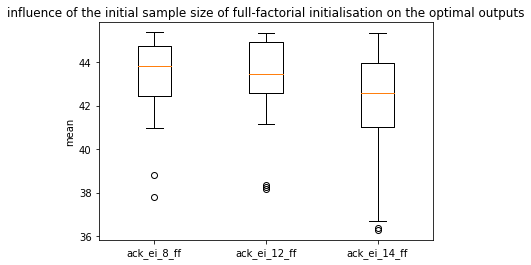

In [200]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.boxplot([get_best_evlauation_scores(ackley_results['ack_ei_8_ff']), get_best_evlauation_scores(ackley_results['ack_ei_12_ff']), get_best_evlauation_scores(ackley_results['ack_ei_14_ff'])])
ax.set_xticklabels(["ack_ei_8_ff", "ack_ei_12_ff", "ack_ei_14_ff"]) 
ax.set_ylabel("mean") 
ax.set_title("influence of the initial sample size of full-factorial initialisation on the optimal outputs")
plt.show()

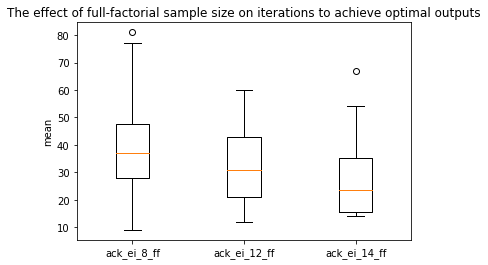

In [201]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.boxplot([get_best_iter_with_start_idx(ackley_results['ack_ei_8_ff'], 8), get_best_iter_with_start_idx(ackley_results['ack_ei_12_ff'], 12), get_best_iter_with_start_idx(ackley_results['ack_ei_14_ff'], 14)])
ax.set_xticklabels(["ack_ei_8_ff", "ack_ei_12_ff", "ack_ei_14_ff"]) 
ax.set_ylabel("mean") 
ax.set_title("The effect of full-factorial sample size on iterations to achieve optimal outputs")
plt.show()

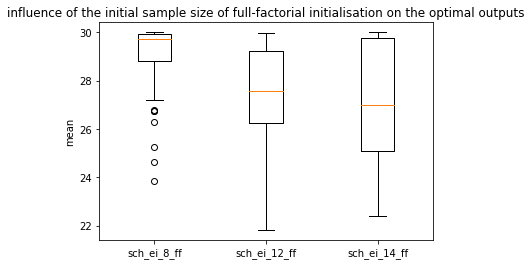

In [202]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.boxplot([get_best_evlauation_scores(schaffer_results['sch_ei_8_ff']), get_best_evlauation_scores(schaffer_results['sch_ei_12_ff']), get_best_evlauation_scores(schaffer_results['sch_ei_14_ff'])])
ax.set_xticklabels(["sch_ei_8_ff", "sch_ei_12_ff", "sch_ei_14_ff"]) 
ax.set_ylabel("mean") 
ax.set_title("influence of the initial sample size of full-factorial initialisation on the optimal outputs")
plt.show()

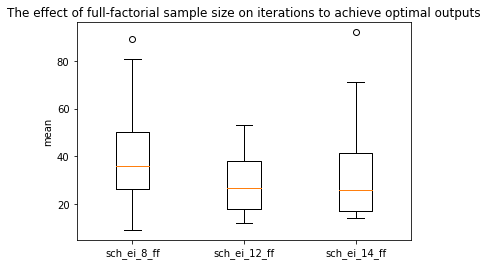

In [203]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.boxplot([get_best_iter_with_start_idx(schaffer_results['sch_ei_8_ff'], 8), get_best_iter_with_start_idx(schaffer_results['sch_ei_12_ff'], 12), get_best_iter_with_start_idx(schaffer_results['sch_ei_14_ff'], 14)])
ax.set_xticklabels(["sch_ei_8_ff", "sch_ei_12_ff", "sch_ei_14_ff"]) 
ax.set_ylabel("mean") 
ax.set_title("The effect of full-factorial sample size on iterations to achieve optimal outputs")
plt.show()

In [204]:
best_value_mean(ackley_results)


{'ack_ei_8_ff': 43.4307205676641,
 'ack_ei_12_ff': 43.39486548927565,
 'ack_ei_14_ff': 42.03190296645938,
 'ack_pi_8_ff': 43.3372929507339,
 'ack_pi_12_ff': 42.94122549895994,
 'ack_pi_14_ff': 42.172121130267875,
 'ack_ei_8_rd': 43.43119019984672,
 'ack_ei_12_rd': 43.57646165170003,
 'ack_ei_14_rd': 43.78941691502186,
 'ack_pi_8_rd': 43.569691367581854,
 'ack_pi_12_rd': 43.72894597874801,
 'ack_pi_14_rd': 43.72659999856877,
 'ack_ucb_8_ff': 43.845277002081055,
 'ack_ucb_12_ff': 43.41160799231021,
 'ack_ucb_14_ff': 42.096971452518716,
 'ack_ucb_8_rd': 44.065969999898556,
 'ack_ucb_12_rd': 43.76860532322339,
 'ack_ucb_14_rd': 43.803447743262495,
 'ack_ei_8_do': 43.89478393616845,
 'ack_ei_12_do': 43.79306475092456,
 'ack_ei_14_do': 43.65545594453597,
 'ack_pi_8_do': 43.86645174207707,
 'ack_pi_12_do': 43.93280001558219,
 'ack_pi_14_do': 43.90613091131107,
 'ack_ucb_8_do': 43.452958914907285,
 'ack_ucb_12_do': 43.795439776869124,
 'ack_ucb_14_do': 43.69774374294514,
 'ack_ei_8_io': 43.501

In [205]:
best_iter_mean(ackley_results)

{'ack_ei_8_ff': (37.4, 17.953272682160208),
 'ack_ei_12_ff': (31.38, 15.074335806263571),
 'ack_ei_14_ff': (23.04, 15.455691508308519),
 'ack_pi_8_ff': (36.32, 17.5036453346153),
 'ack_pi_12_ff': (35.4, 16.706884808365682),
 'ack_pi_14_ff': (24.8, 13.455110553243331),
 'ack_ei_8_rd': (48.58, 15.552607498422892),
 'ack_ei_12_rd': (51.46, 11.660548872158635),
 'ack_ei_14_rd': (53.02, 17.029961832018298),
 'ack_pi_8_rd': (46.96, 17.321616552735488),
 'ack_pi_12_rd': (47.5, 19.530744993471192),
 'ack_pi_14_rd': (52.48, 17.356543434681917),
 'ack_ucb_8_ff': (40.94, 20.078256896453933),
 'ack_ucb_12_ff': (39.82, 16.81391090734098),
 'ack_ucb_14_ff': (20.36, 15.473538703218471),
 'ack_ucb_8_rd': (47.4, 19.31010098368209),
 'ack_ucb_12_rd': (47.0, 17.003529045465825),
 'ack_ucb_14_rd': (54.04, 15.746694891309732),
 'ack_ei_8_do': (52.18, 18.673714145825407),
 'ack_ei_12_do': (55.0, 16.870091878825082),
 'ack_ei_14_do': (51.38, 15.73517079665804),
 'ack_pi_8_do': (55.96, 17.1906486206891),
 'ac

In [206]:
best_value_mean(schaffer_results)

{'sch_ei_8_ff': 28.936597456778845,
 'sch_ei_12_ff': 27.41386581793992,
 'sch_ei_14_ff': 27.171067532026182,
 'sch_pi_8_ff': 29.099780278721834,
 'sch_pi_12_ff': 26.84816580010093,
 'sch_pi_14_ff': 27.703826962470085,
 'sch_ei_8_rd': 27.949298521715942,
 'sch_ei_12_rd': 28.114919306055686,
 'sch_ei_14_rd': 28.418898536639727,
 'sch_pi_8_rd': 28.118104665569852,
 'sch_pi_12_rd': 27.438239691014175,
 'sch_pi_14_rd': 28.547807574903505,
 'sch_ucb_8_ff': 28.581846295998254,
 'sch_ucb_12_ff': 27.37324728809239,
 'sch_ucb_14_ff': 27.577820804016156,
 'sch_ucb_8_rd': 28.01305421106039,
 'sch_ucb_12_rd': 27.955309114441228,
 'sch_ucb_14_rd': 28.29295443069942,
 'sch_ei_8_do': 29.4701174959829,
 'sch_ei_12_do': 29.41452834946106,
 'sch_ei_14_do': 29.40676546452521,
 'sch_pi_8_do': 29.366225631511725,
 'sch_pi_12_do': 28.93464736642989,
 'sch_pi_14_do': 29.549685364602446,
 'sch_ucb_8_do': 28.40828410610699,
 'sch_ucb_12_do': 29.235447874765967,
 'sch_ucb_14_do': 29.220182967231718,
 'sch_ei_8_i

In [207]:
best_iter_mean(schaffer_results)

{'sch_ei_8_ff': (37.88, 19.602693692449517),
 'sch_ei_12_ff': (24.38, 14.123583114776505),
 'sch_ei_14_ff': (27.02, 20.647023998629926),
 'sch_pi_8_ff': (38.9, 23.068810112357333),
 'sch_pi_12_ff': (25.08, 19.00088418995285),
 'sch_pi_14_ff': (25.74, 17.20675448770046),
 'sch_ei_8_rd': (28.5, 17.765415840897166),
 'sch_ei_12_rd': (36.26, 21.03027341714796),
 'sch_ei_14_rd': (28.2, 17.847128620593285),
 'sch_pi_8_rd': (29.46, 19.326882831951977),
 'sch_pi_12_rd': (34.78, 19.736554917208828),
 'sch_pi_14_rd': (29.04, 19.7250703420799),
 'sch_ucb_8_ff': (41.48, 22.815994389901135),
 'sch_ucb_12_ff': (24.52, 17.387627785296072),
 'sch_ucb_14_ff': (21.12, 15.107137386017246),
 'sch_ucb_8_rd': (26.84, 14.68381421838345),
 'sch_ucb_12_rd': (27.24, 17.518630083428327),
 'sch_ucb_14_rd': (28.3, 17.10701610451104),
 'sch_ei_8_do': (40.22, 19.84367909436151),
 'sch_ei_12_do': (38.5, 19.753733824267247),
 'sch_ei_14_do': (38.64, 19.66698756800339),
 'sch_pi_8_do': (41.72, 19.810138818292014),
 'sc